# Intel Image Classification
dataset :: https://www.kaggle.com/puneet6060/intel-image-classification

### Categaries: 
##### 'buildings' -> 0,
##### 'forest'    -> 1,
##### 'glacier'   -> 2,
##### 'mountain'  -> 3,
##### 'sea'       -> 4,
##### 'street'    -> 5



# Load Dataset 

In [3]:

data_dir = 'D:\\Images\\ds1\\intel-image-classification\\seg_train'

Import Autokeras required libraries for training model

In [4]:
import autokeras as ak
import tensorflow as tf
import os

# Preprocessing Dataset 

In [16]:
batch_size = 64
img_height = 180
img_width = 180

train_data = ak.image_dataset_from_directory(
    data_dir,
    # Use 20% data as testing data.
    validation_split=0.2,
    subset="training",
    # Set seed to ensure the same split when loading testing data.
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_data = ak.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 17034 files belonging to 6 classes.
Using 13628 files for training.
Found 17034 files belonging to 6 classes.
Using 3406 files for validation.


Creating checkpoint for Saving best model in training time

In [17]:
from keras.callbacks import ModelCheckpoint
model_path = 'intel_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Creating Classifier and fitting data in classifier

In [18]:
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

In [19]:
clf.fit(train_data, epochs=30,callbacks=callbacks_list)

Trial 1 Complete [02h 23m 28s]
val_loss: 0.8120232820510864

Best val_loss So Far: 0.8120232820510864
Total elapsed time: 02h 23m 28s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
213/213 [==============================] - 850s 4s/step - loss: 1.7460 - accuracy: 0.5896
Epoch 2/30
213/213 [==============================] - 794s 4s/step - loss: 0.6749 - accuracy: 0.7635
Epoch 3/30
213/213 [==============================] - 791s 4s/step - loss: 0.4506 - accuracy: 0.8418
Epoch 4/30
213/213 [==============================] - 791s 4s/step - loss: 0.3111 - accuracy: 0.8929
Epoch 5/30
213/213 [==============================] - 796s 4s/step - loss: 0.2575 - accuracy: 0.9132
Epoch 6/30
213/213 [==============================] - 26964s 127s/step - loss: 0.1986 - accuracy: 0.9352
Epoch 7/30
213/213 [==============================] - 4215s 20s/step - loss: 0.1484 - accuracy: 0.9503
Epoch 8/30
213/213 [==============================] - 770s 4s/step - loss: 0.1079 - accuracy: 0.9649
Epoch 9/30
213

# Evaluating the accuracy

In [20]:
print(clf.evaluate(test_data))

54/54 [==============================] - 68s 1s/step - loss: 1.6887 - accuracy: 0.7463
[1.6886825561523438, 0.7463300228118896]


### Getting prediction result

In [23]:
ypred = clf.predict(test_data)
ypred

array([['mountain'],
       ['mountain'],
       ['forest'],
       ...,
       ['glacier'],
       ['buildings'],
       ['street']], dtype='<U9')

#### Exporting model

In [24]:
# model = clf.export_model()
# model.save("model_autokeras.h5")

In [127]:
# from tensorflow.keras.models import load_model

# model = load_model("model_autokeras.h5", custom_objects=ak.CUSTOM_OBJECTS)

# predicted_y = model.predict(test_data)

In [128]:
# predicted_categories = tf.argmax(predicted_y, axis=1)

### getting labels from test data

In [131]:
test_categories = tf.concat([y for x, y in test_data], axis=0)
test_categories

<tf.Tensor: shape=(3406,), dtype=string, numpy=
array([b'glacier', b'sea', b'forest', ..., b'glacier', b'street',
       b'street'], dtype=object)>

In [137]:
import numpy as np
a = test_categories.numpy()
y_true = np.asarray(a, dtype=str)
print(y_true)


['glacier' 'sea' 'forest' ... 'glacier' 'street' 'street']


## Getting Confusion metrix and Classification Report

In [139]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_true, ypred))

              precision    recall  f1-score   support

   buildings       0.72      0.70      0.71       537
      forest       0.90      0.91      0.90       567
     glacier       0.65      0.82      0.73       585
    mountain       0.73      0.62      0.67       601
         sea       0.80      0.64      0.71       543
      street       0.72      0.79      0.75       573

    accuracy                           0.75      3406
   macro avg       0.75      0.75      0.75      3406
weighted avg       0.75      0.75      0.74      3406



In [141]:
cm = confusion_matrix(y_true, ypred)
print(cm)


[[375  14  23  13   9 103]
 [ 11 515   5   7   1  28]
 [ 11   6 479  54  24  11]
 [ 17   8 139 374  45  18]
 [ 38   3  80  57 347  18]
 [ 70  27  10   7   7 452]]


<AxesSubplot:>

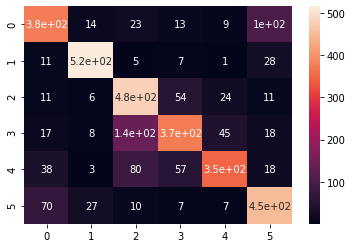

In [142]:
import seaborn as sns
sns.heatmap(cm, annot=True,)

In [143]:
ac = accuracy_score(y_true, ypred)

In [145]:
ac

0.7463300058719906